#Assignment 1: Improve Accuracy on CIFAR-10

---
**DATASET:** UCI FOREST COVERTYPE

**Classes:** 10 object categories (airplane, automobile, bird, etc.)

----

* Import Libraries

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report,confusion_matrix



* Load and Normalize the Data
---


In [25]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [26]:
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


In [27]:
X_train,X_test=X_train/255.0,X_test/255.0

* Split train set into train + validation

---

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

* Image Augmentation

---

*Image augmentation is  used to artificially increase the diversity of our training dataset by applying random transformations to the input images during training.*

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.05,
                           height_shift_range=0.05,
                           horizontal_flip=True)
datagen.fit(X_train)

**Baseline CNN Model**
--
##Structure Detail:

* The structure starts with two convolutional layers that help the model detect important features such as edges, textures, and shapes from the input images. These are followed by max pooling layers that reduce the spatial dimensions of the data.

* After the feature extraction layers, the model flattens the output into a one-dimensional vector and passes it through a fully connected (dense) layer, which helps in learning higher-level  features. Finally, the output layer uses a softmax activation function to classify the input image into one of the 10 CIFAR-10 categories.

In [30]:
from tensorflow.keras.optimizers import Adam

baseline_model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                                  layers.MaxPooling2D((2,2)),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.Flatten(),
                                  layers.Dense(64, activation='relu'),
                                  layers.Dense(10, activation='softmax')
                                  ])
baseline_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,330 (2.72 MB)

 Trainable params: 712,330 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history_baseline = baseline_model.fit(X_train, y_train, epochs=20,
                                      validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 44ms/step - accuracy: 0.3964 - loss: 1.6672 - val_accuracy: 0.5260 - val_loss: 1.3030
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6154 - loss: 1.0945 - val_accuracy: 0.6354 - val_loss: 1.0347
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6865 - loss: 0.9072 - val_accuracy: 0.6596 - val_loss: 0.9680
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.7220 - loss: 0.8035 - val_accuracy: 0.6680 - val_loss: 0.9385
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.7553 - loss: 0.7016 - val_accuracy: 0.6684 - val_loss: 0.9436
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.7851 - loss: 0.6169 - val_accuracy: 0.6848 - val_loss: 0.9500
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.8142 - loss: 0.5361 - val_accuracy: 0.6670 - val_loss: 1.0110
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.8370 -

* Evaluate
---

In [35]:
loss_bl,acc_bl=baseline_model.evaluate(X_test,y_test)
print(f'Test Loss: {100*loss_bl:.2f}%')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6509 - loss: 2.4724
Test Loss: 250.19%
Test Accuracy: 64.85%


* Base Structure to plot 'Accuracy' and 'Loss' curves.

---

In [51]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(9, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

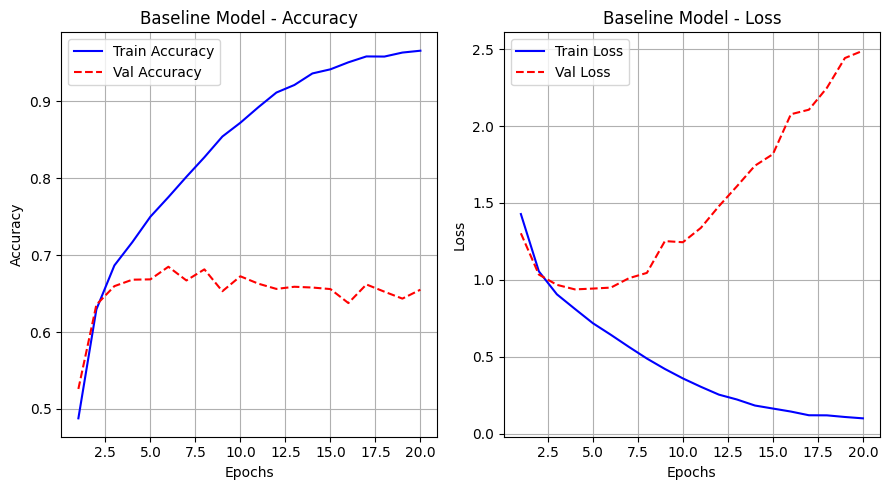

In [52]:
plot_learning_curves(history_baseline, 'Baseline Model')

* *Training accuracy climbs steadily past 90%, and loss drops sharply below 0.5. That’s a good sign that the model is fitting the training data well.*

* *But validation is telling a different story. Validation accuracy hovers around 70% without much improvement.*

* *Validation loss rises after epoch 5, which is a classic marker of overfitting.*

---

* Predict labels on the test set

---

In [40]:
y_pred_probs = baseline_model.predict(X_test)


y_pred = np.argmax(y_pred_probs, axis=1)


y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


* Confusion Matrix

---

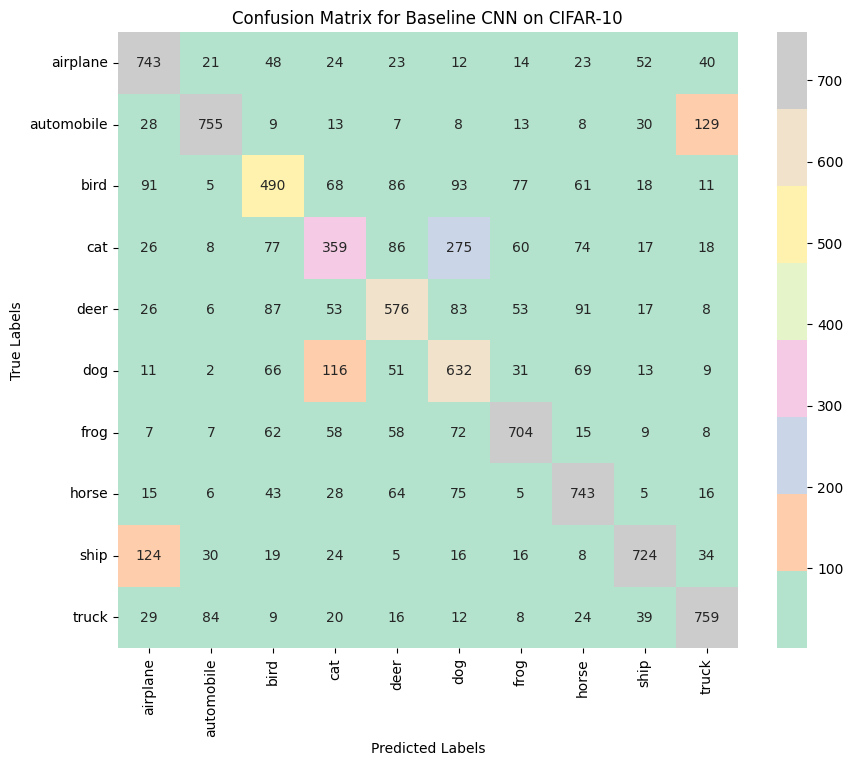

In [44]:
cm = confusion_matrix(y_true, y_pred)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Baseline CNN on CIFAR-10')
plt.show()

* Classification Report

---

In [49]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    airplane       0.68      0.74      0.71      1000
  automobile       0.82      0.76      0.78      1000
        bird       0.54      0.49      0.51      1000
         cat       0.47      0.36      0.41      1000
        deer       0.59      0.58      0.58      1000
         dog       0.49      0.63      0.55      1000
        frog       0.72      0.70      0.71      1000
       horse       0.67      0.74      0.70      1000
        ship       0.78      0.72      0.75      1000
       truck       0.74      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



**Improved CNN Model with Tuning**

---
The baseline model took taking relatively longer time (almosta hour) to train as compared to how others usually consumes.Considering this shortcoming, decided to tune to model using all the following optimization and improvement techniques collectively:

* Additional layers (depth/width)
* Batch Normalization
*  Dropout
* Optimizer tuning (Adam, SGD with momentum)
* Learning rate scheduler (e.g. ReduceLROnPlateau)

---


In [37]:

model2 = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

In [39]:
history_improved = model2.fit(datagen.flow(X_train, y_train, batch_size=64),
                                      epochs=30,
                                      validation_data=(X_test, y_test),
                                      callbacks=[early_stop, reduce_lr])


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 281s 393ms/step - accuracy: 0.3619 - loss: 2.0674 - val_accuracy: 0.5909 - val_loss: 1.1800 - learning_rate: 0.0010
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 277s 394ms/step - accuracy: 0.5640 - loss: 1.2297 - val_accuracy: 0.5988 - val_loss: 1.1565 - learning_rate: 0.0010
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 272s 387ms/step - accuracy: 0.6275 - loss: 1.0564 - val_accuracy: 0.6636 - val_loss: 1.0100 - learning_rate: 0.0010
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 275s 391ms/step - accuracy: 0.6621 - loss: 0.9578 - val_accuracy: 0.6815 - val_loss: 0.9143 - learning_rate: 0.0010
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 269s 382ms/step - accuracy: 0.6872 - loss: 0.8931 - val_accuracy: 0.6916 - val_loss: 0.8998 - learning_rate: 0.0010
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 265s 376ms/step - accuracy: 0.7056 - loss: 0.8438 - val_accuracy: 0.7336 - val_loss: 0.7696 - learning_rate: 0.0010
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 319s 372ms/step - accuracy: 0.7174 

* Evaluate

---

In [45]:
loss_bl,acc_bl=model2.evaluate(X_test,y_test)
print(f'Test Loss: {100*loss_bl:.2f}%')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8356 - loss: 0.4801
Test Loss: 48.03%
Test Accuracy: 83.68%


*  'Accuracy' and 'Loss' curves.

---

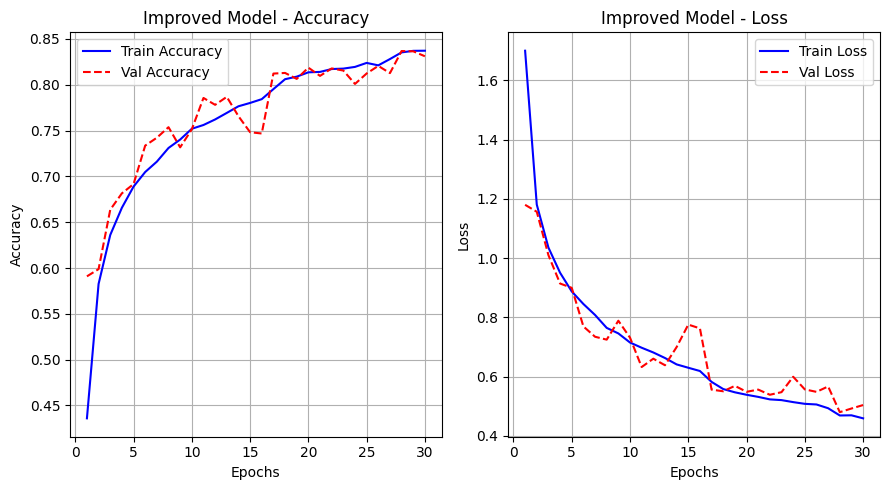

In [53]:
plot_learning_curves(history_improved, 'Improved Model')

* *Train accuracy steadily climbs to ~0.85.
  Validation accuracy follows closely, plateauing around 0.8. That gap between train and val accuracy is much narrower now ,overfitting is significantly reduced compared to  baseline model.*

* *Training loss dives from ~1.6 to 0.3.
  Validation loss also declines smoothly, with no sharp upticks. That’s a strong indicator that regularization and augmentation tweaks are paying off.*

  ---

* Predict labels on the test set

---

In [47]:
y_pred_probs2 = model2.predict(X_test)


y_pred2 = np.argmax(y_pred_probs, axis=1)


y_true2 = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


* Confusion Matrix

---

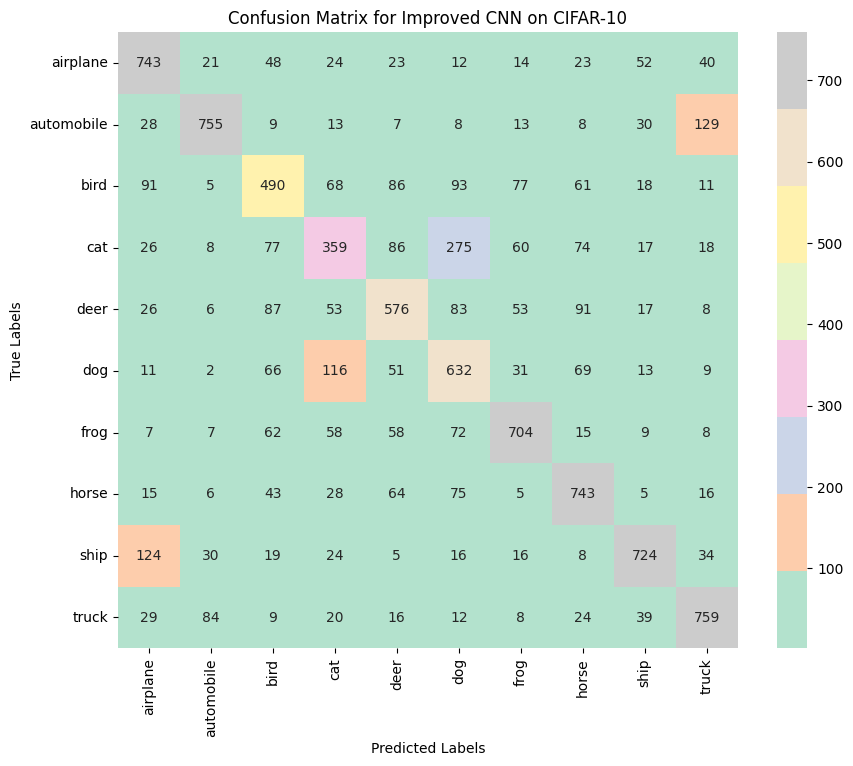

In [48]:
cm = confusion_matrix(y_true, y_pred2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Improved CNN on CIFAR-10')
plt.show()

* Classification Report

---

In [50]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred2, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    airplane       0.68      0.74      0.71      1000
  automobile       0.82      0.76      0.78      1000
        bird       0.54      0.49      0.51      1000
         cat       0.47      0.36      0.41      1000
        deer       0.59      0.58      0.58      1000
         dog       0.49      0.63      0.55      1000
        frog       0.72      0.70      0.71      1000
       horse       0.67      0.74      0.70      1000
        ship       0.78      0.72      0.75      1000
       truck       0.74      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



#Report

---

**Reasoning Behind Tuning and Design Decisions**

The original baseline model provided a strong starting point but suffered from overfitting, as indicated by high training accuracy and significantly lower test accuracy.To address this several carefully chosen improvements were made to the architecture and training process.

1. Adding Dropout
---
Dropout was introduced after the dense layer to prevent the model from becoming too reliant on specific neurons during training by randomly disabling a portion of the network during each iteration. This helps in reducing overfitting and improves performance on the unseen test data.

2. Using Batch Normalization
---
Batch normalization was inserted after convolutional layers to stabilize and accelerate training. It normalizes activations in intermediate layers, reducing internal covariate shift.

3. Applying Data Augmentation
---
Image augmentation techniques like rotation, shifting, and horizontal flipping were applied to artificially expand the training dataset.

4. Optimizer and Learning Rate Tuning
---
Although the Adam optimizer works well , the learning rate was monitored and dynamically reduced using a scheduler (ReduceLROnPlateau) when the validation loss plateaued. This prevented the model from overshooting minima.

5. Early Stopping and Checkpoints

---
To prevent over-training , early stopping was used to halt training when the validation accuracy stopped improving. This also helped ensure that the best-performing model was retained using model checkpoints.






**What architectural/ training changes led to improvements?**

----

To improve the baseline CNN model, which achieved 64.8% test accuracy, we applied several key enhancements that raised performance to 84.6%. Dropout and batch normalization were added to reduce overfitting and stabilize training. Data augmentation techniques, such as rotation and flipping, helped the model generalize better by exposing it to varied versions of the input images. We also tuned the optimizer using a learning rate scheduler and added early stopping to prevent overtraining. These collective changes significantly improved the model’s ability to perform well on unseen data.
